In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"   #(xxxx is your specific GPU ID)

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Activation, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from MyEarlyStopping import MyEarlyStopping
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# from keras.optimizers import adam
from sklearn.metrics.pairwise import cosine_similarity
import timeit
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder  
from sklearn.metrics import average_precision_score, precision_recall_curve

# load dataset 

In [3]:
train_number = 5
train_image = 20 #10:20%, 20: 40%, 30:60%
train_image_s2 = 30 #10:20%, 20: 40%, 30:60%

## Training dataset (40%)

In [4]:
train_data = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_data.flow_from_directory('/data/home/cou/yuli5/Audio/Audio_MEL_Data/train',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                               shuffle=False)

Found 1714 images belonging to 10 classes.


In [5]:
image_names = train_generator.filenames
image_no = [i.split("/")[1].split("_")[2].split(".")[0] for i in image_names]
image_no = np.array(list(map(int, image_no)))
ALL_participant_class = [i.split("/")[1].split("_")[1] for i in image_names]
ALL_participant_class = np.array(list(map(int, ALL_participant_class)))
command_class = train_generator.classes
All_participant_class = tf.keras.utils.to_categorical(ALL_participant_class-1, num_classes=train_number)
All_command_class = tf.keras.utils.to_categorical(command_class, num_classes=10)
All_command_uniform = All_command_class*0+1/10

In [6]:
All_Inputs = [next(train_generator)[0][0] for _ in range(len(train_generator))]
All_Inputs = np.array(All_Inputs)

In [7]:
select_indexs_train = ((image_no<train_image)&(ALL_participant_class!=2))|((image_no<train_image_s2)&(ALL_participant_class==2))
Train_Inputs = All_Inputs[select_indexs_train]
Train_participant_class = All_participant_class[select_indexs_train]
Train_participant_uniform = Train_participant_class*0+1/train_number
Train_command_class = All_command_class[select_indexs_train]
Train_command_uniform = Train_command_class*0+1/10
# sum(Train_participant_class)


## Test dataset (20%)

In [8]:
test_data = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_data.flow_from_directory('/data/home/cou/yuli5/Audio/Audio_MEL_Data/test',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 543 images belonging to 10 classes.


In [9]:
image_names = test_generator.filenames
participant_class = [i.split("/", 1)[1].split("_")[1] for i in image_names]
test_unit_participant_class = np.array(list(map(int, participant_class)))
test_unit_command_class = test_generator.classes
Test_participant_class = tf.keras.utils.to_categorical(test_unit_participant_class-1, num_classes=train_number)
Test_participant_uniform = Test_participant_class*0+1/train_number
Test_command_class = tf.keras.utils.to_categorical(test_unit_command_class, num_classes=10)
Test_command_uniform = Test_command_class*0+1/10

In [10]:
Test_Inputs = [next(test_generator)[0][0] for _ in range(len(test_generator))]
Test_Inputs = np.array(Test_Inputs)

In [11]:
Test_Inputs_1 = Test_Inputs[np.where(test_unit_participant_class == 1)]
Test_command_class_1 = Test_command_class[np.where(test_unit_participant_class == 1)]
Test_Inputs_2 = Test_Inputs[np.where(test_unit_participant_class == 2)]
Test_command_class_2 = Test_command_class[np.where(test_unit_participant_class == 2)]
Test_Inputs_3 = Test_Inputs[np.where(test_unit_participant_class == 3)]
Test_command_class_3 = Test_command_class[np.where(test_unit_participant_class == 3)]
Test_Inputs_4 = Test_Inputs[np.where(test_unit_participant_class == 4)]
Test_command_class_4 = Test_command_class[np.where(test_unit_participant_class == 4)]
Test_Inputs_5 = Test_Inputs[np.where(test_unit_participant_class == 5)]
Test_command_class_5 = Test_command_class[np.where(test_unit_participant_class == 5)]

## Speaker 6 Test dataset # 

In [12]:
test_data_6 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator_6 = test_data_6.flow_from_directory('/data/home/cou/yuli5/Audio/Audio_MEL_subject/p_6_split/test',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 100 images belonging to 10 classes.


In [13]:
image_names = test_generator_6.filenames
command_class = [i.split("/", 1)[0]for i in image_names]
le = LabelEncoder()
test_unit_command_class_6 = le.fit_transform(command_class)
Test_command_class_6 = tf.keras.utils.to_categorical(test_unit_command_class_6, num_classes=10)

In [14]:
Test_Inputs_6 = [next(test_generator_6)[0][0] for _ in range(len(test_generator_6))]
Test_Inputs_6 = np.array(Test_Inputs_6)

## Speaker 7 Test dataset 

In [15]:
test_data_7 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator_7 = test_data_6.flow_from_directory('/data/home/cou/yuli5/Audio/Audio_MEL_subject/p_7_split/test',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 125 images belonging to 10 classes.


In [16]:
image_names = test_generator_7.filenames
command_class = [i.split("/", 1)[0]for i in image_names]
le = LabelEncoder()
test_unit_command_class_7 = le.fit_transform(command_class)
Test_command_class_7 = tf.keras.utils.to_categorical(test_unit_command_class_7, num_classes=10)

In [17]:
Test_Inputs_7 = [next(test_generator_7)[0][0] for _ in range(len(test_generator_7))]
Test_Inputs_7 = np.array(Test_Inputs_7)

## Speaker 8 Test dataset 

In [18]:
test_data_8 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator_8 = test_data_8.flow_from_directory('/data/home/cou/yuli5/Audio/Audio_MEL_subject/p_8_split/test',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 101 images belonging to 10 classes.


In [19]:
image_names = test_generator_8.filenames
command_class = [i.split("/", 1)[0]for i in image_names]
le = LabelEncoder()
test_unit_command_class_8 = le.fit_transform(command_class)
Test_command_class_8 = tf.keras.utils.to_categorical(test_unit_command_class_8, num_classes=10)

In [20]:
Test_Inputs_8 = [next(test_generator_8)[0][0] for _ in range(len(test_generator_8))]
Test_Inputs_8 = np.array(Test_Inputs_8)

# load trained model

In [21]:
resnet_model = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

In [22]:
Embedding_model = tf.keras.models.Model(inputs=resnet_model.input,
                                 outputs=resnet_model.get_layer("flatten_1").output)

# get average embedding value based on training data

In [23]:
# average all training subject embedding
embd_sub_1 = Embedding_model.predict(All_Inputs[ALL_participant_class==1]).mean(axis=0).reshape(1, -1)
embd_sub_2 = Embedding_model.predict(All_Inputs[ALL_participant_class==2]).mean(axis=0).reshape(1, -1)
embd_sub_3 = Embedding_model.predict(All_Inputs[ALL_participant_class==3]).mean(axis=0).reshape(1, -1)
embd_sub_4 = Embedding_model.predict(All_Inputs[ALL_participant_class==4]).mean(axis=0).reshape(1, -1)
embd_sub_5 = Embedding_model.predict(All_Inputs[ALL_participant_class==5]).mean(axis=0).reshape(1, -1)
embd_allsubs = Embedding_model.predict(All_Inputs).mean(axis=0).reshape(1, -1)

# end-to-end speaker verification 

## calculation 

In [24]:
CosSimty = pd.DataFrame(columns=["Real_sub","cos_sub_1","cos_sub_2","cos_sub_3","cos_sub_4","cos_sub_5","cos_all"])

In [25]:
#speaker 1-5
for i in range(1,6):
    test_Data = Test_Inputs[np.where(test_unit_participant_class == i)]
    temp = pd.DataFrame(columns=["Real_sub","cos_sub_1","cos_sub_2","cos_sub_3","cos_sub_4","cos_sub_5","cos_all"])
    temp["Real_sub"] = [i]*len( test_Data )
    temp["cos_sub_1"]= cosine_similarity(Embedding_model.predict( test_Data ), embd_sub_1)
    temp["cos_sub_2"]= cosine_similarity(Embedding_model.predict( test_Data ), embd_sub_2)
    temp["cos_sub_3"]= cosine_similarity(Embedding_model.predict( test_Data ), embd_sub_3)
    temp["cos_sub_4"]= cosine_similarity(Embedding_model.predict( test_Data ), embd_sub_4)
    temp["cos_sub_5"]= cosine_similarity(Embedding_model.predict( test_Data ), embd_sub_5)
    temp["cos_all"]= cosine_similarity(Embedding_model.predict( test_Data ), embd_allsubs)

    CosSimty = CosSimty.append(temp,ignore_index=True)

#speaker 6
temp = pd.DataFrame(columns=["Real_sub","cos_sub_1","cos_sub_2","cos_sub_3","cos_sub_4","cos_sub_5","cos_all"])
temp["Real_sub"] = [6]*len( Test_Inputs_6)
temp["cos_sub_1"]= cosine_similarity(Embedding_model.predict( Test_Inputs_6 ), embd_sub_1)
temp["cos_sub_2"]= cosine_similarity(Embedding_model.predict( Test_Inputs_6 ), embd_sub_2)
temp["cos_sub_3"]= cosine_similarity(Embedding_model.predict( Test_Inputs_6 ), embd_sub_3)
temp["cos_sub_4"]= cosine_similarity(Embedding_model.predict( Test_Inputs_6 ), embd_sub_4)
temp["cos_sub_5"]= cosine_similarity(Embedding_model.predict( Test_Inputs_6 ), embd_sub_5)
temp["cos_all"]= cosine_similarity(Embedding_model.predict( Test_Inputs_6 ), embd_allsubs)
CosSimty = CosSimty.append(temp,ignore_index=True)

#speaker 7
temp = pd.DataFrame(columns=["Real_sub","cos_sub_1","cos_sub_2","cos_sub_3","cos_sub_4","cos_sub_5","cos_all"])
temp["Real_sub"] = [7]*len( Test_Inputs_7 )
temp["cos_sub_1"]= cosine_similarity(Embedding_model.predict( Test_Inputs_7 ), embd_sub_1)
temp["cos_sub_2"]= cosine_similarity(Embedding_model.predict( Test_Inputs_7 ), embd_sub_2)
temp["cos_sub_3"]= cosine_similarity(Embedding_model.predict( Test_Inputs_7 ), embd_sub_3)
temp["cos_sub_4"]= cosine_similarity(Embedding_model.predict( Test_Inputs_7 ), embd_sub_4)
temp["cos_sub_5"]= cosine_similarity(Embedding_model.predict( Test_Inputs_7 ), embd_sub_5)
temp["cos_all"]= cosine_similarity(Embedding_model.predict( Test_Inputs_7 ), embd_allsubs)
CosSimty = CosSimty.append(temp,ignore_index=True)

#speaker 8
temp = pd.DataFrame(columns=["Real_sub","cos_sub_1","cos_sub_2","cos_sub_3","cos_sub_4","cos_sub_5","cos_all"])
temp["Real_sub"] = [8]*len( Test_Inputs_8 )
temp["cos_sub_1"]= cosine_similarity(Embedding_model.predict( Test_Inputs_8 ), embd_sub_1)
temp["cos_sub_2"]= cosine_similarity(Embedding_model.predict( Test_Inputs_8 ), embd_sub_2)
temp["cos_sub_3"]= cosine_similarity(Embedding_model.predict( Test_Inputs_8 ), embd_sub_3)
temp["cos_sub_4"]= cosine_similarity(Embedding_model.predict( Test_Inputs_8 ), embd_sub_4)
temp["cos_sub_5"]= cosine_similarity(Embedding_model.predict( Test_Inputs_8 ), embd_sub_5)
temp["cos_all"]= cosine_similarity(Embedding_model.predict( Test_Inputs_8 ), embd_allsubs)
CosSimty = CosSimty.append(temp,ignore_index=True)

<AxesSubplot:ylabel='Real_sub'>

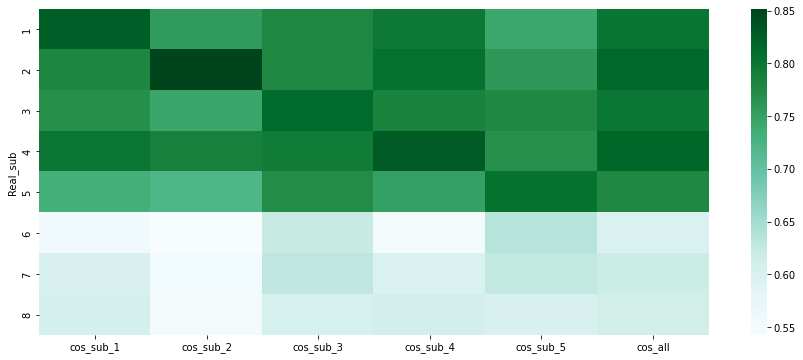

In [26]:
df = CosSimty.groupby(["Real_sub"]).mean()
plt.figure(figsize=(15,6))
sns.heatmap(df.iloc[:,:],cmap="BuGn")